In [30]:
import matplotlib.pyplot as plt
import numpy as np
import json

%matplotlib inline

In [52]:
def plot_valid_loss(path):
    with open(path, 'r') as log:
        plt.figure(figsize=((10,10)))
        log = [json.loads(i) for i in log]
        losses = np.array([[i['valid_loss'],i['jaccard_loss'],i['step']] for i in log if 'valid_loss' in i.keys() ])
        plt.plot(losses[:,2], losses[:,0], c='b')
        plt.plot(losses[:,2], losses[:,1], c='r')
        plt.show()

In [48]:
def plot_loss(path):
    with open(path, 'r') as log:
        plt.figure(figsize=((10,10)))
        log = [json.loads(i) for i in log]
        losses = np.array([[i['loss'],i['step']] for i in log if 'loss' in i.keys() ])
        plt.plot(losses[:,1], losses[:,0])
        plt.show()

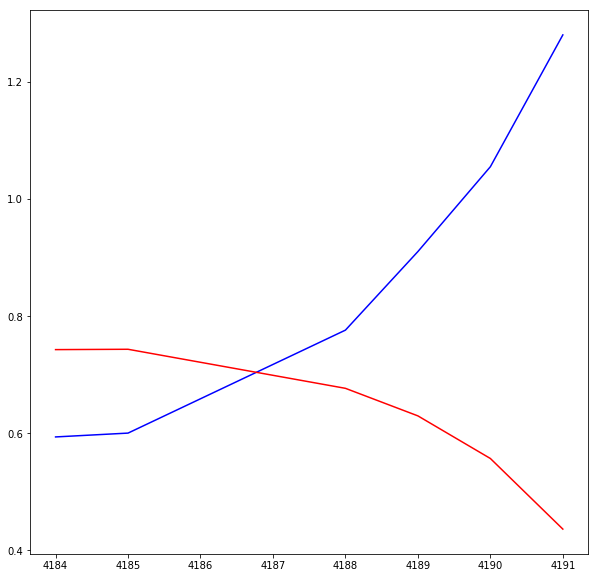

In [57]:
plot_valid_loss('../unet/runs/debug/train_0.log')

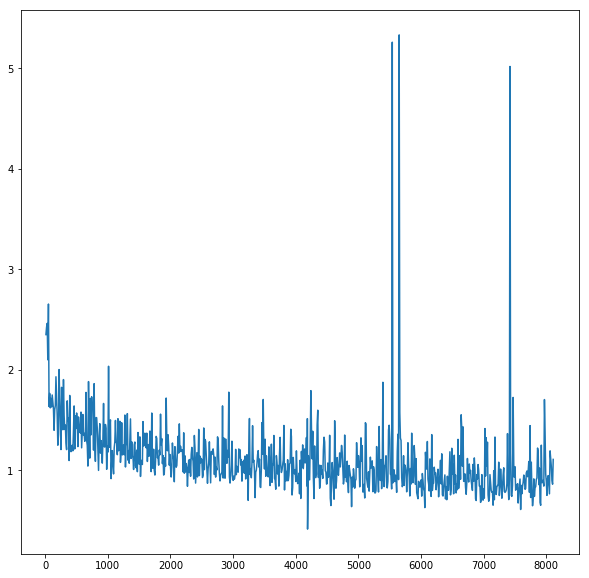

In [59]:
plot_loss('../unet/runs/debug/train_0.log')

In [9]:
with open('../unet/runs/debug/train_0.log', 'r') as log:
    log = [json.loads(i) for i in log]

In [24]:
if 'loss' in log[1].keys():
    print('hi')

hi


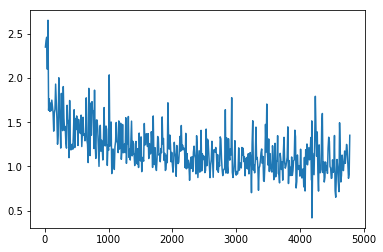

In [33]:
plt.plot(losses[:,1], losses[:,0])

In [25]:
[i['step'] if 'loss' in i.keys() for i in log]

SyntaxError: invalid syntax (<ipython-input-25-f21e7019b7ac>, line 1)

In [18]:
log[0].keys()

dict_keys(['dt', 'loss', 'step'])

In [16]:
log[0]['loss']

2.35112464427948

In [ ]:
[ unicode(x.strip()) if x is not None else '' for x in row ]

In [28]:
losses = np.array([[i['loss'],i['step']] for i in log if 'loss' in i.keys() ])